In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Data Preprocessing
Drugs_data = pd.read_csv("drug.csv")
print(Drugs_data)

print("Data Types:\n", Drugs_data.dtypes)
print("---------------------------------------------------------------------")

print("Missing Values:\n", Drugs_data.isnull().sum())


Drugs_data_cleaned = Drugs_data.dropna()












     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  drugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH      NaN  drugX
4     61   F     LOW        HIGH   18.043  drugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL         NaN   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]
Data Types:
 Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object
---------------------------------------------------------------------
Missing Values:
 Age            0
Sex            0
BP             2
Cholesterol    2
Na_to_K        1
Drug           0
dtype: int64


In [4]:

# Separate features and targets
X = Drugs_data_cleaned.drop(columns=['Drug'])
y_status = Drugs_data_cleaned['Drug']

# Categorical feature encoding for X
encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

# Categorical target encoding for y
le_status = LabelEncoder()
y_status_encoded = le_status.fit_transform(y_status)

# Numerical standardization
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])





In [5]:

#experiment no.1
experiment_number = 5
treeSize = []
All_acuracies = []

for i in range(experiment_number):
    X_train, X_test, y_status_train_encoded, y_status_test_encoded = train_test_split(
    X, y_status_encoded, test_size=0.3, random_state=i*40)

    # Create Decision_Tree
    clf = DecisionTreeClassifier(random_state=40)

    clf.fit(X_train, y_status_train_encoded)

    # decision tree size
    size = clf.tree_.node_count
    treeSize.append(size)

    y_pred = clf.predict(X_test)

    # accuracy calculation
    accuracy_i = accuracy_score(y_status_test_encoded, y_pred)
    All_acuracies.append(accuracy_i)

    print(f"Experiment no. {i + 1}:")
    print(f"Size of Decision Tree: {size}")
    print(f"Accuracy equals: {accuracy_i:.2f}")
    print("---------------------------------------------------------------------")

#Best Performing
best_ofAll_experiment = All_acuracies.index(max(All_acuracies))
print(f" The Best Performing Model is fromExperiment number: {best_ofAll_experiment + 1}")
print(f"it's Size  : {treeSize[best_ofAll_experiment]}")
print(f"it's Accuracy : {All_acuracies[best_ofAll_experiment]:.2f}")

# from sklearn.tree import plot_tree



print("---------------------------------------------------------------------")

Experiment no. 1:
Size of Decision Tree: 11
Accuracy equals: 0.98
---------------------------------------------------------------------
Experiment no. 2:
Size of Decision Tree: 11
Accuracy equals: 1.00
---------------------------------------------------------------------
Experiment no. 3:
Size of Decision Tree: 11
Accuracy equals: 0.98
---------------------------------------------------------------------
Experiment no. 4:
Size of Decision Tree: 11
Accuracy equals: 1.00
---------------------------------------------------------------------
Experiment no. 5:
Size of Decision Tree: 11
Accuracy equals: 0.98
---------------------------------------------------------------------
 The Best Performing Model is fromExperiment number: 2
it's Size  : 11
it's Accuracy : 1.00
---------------------------------------------------------------------


In [6]:
#f experiment no.2
Accuracies_Mean = []
Accuracies_Maximum = []
Accuracies_Minimum= []
TreeSizes_Mean = []
TreeSizes_Maximum = []
TreeSizes_Minimum = []

SIze2 = []
All_accuracies2 = []

RandomSeeds_ = [42, 66, 33, 90, 125]
SplitingRRange = range(30, 80, 10)
for SplitRanges in SplitingRRange:
    SplitRanges /= 100.0
    TrainingSetSize=1-SplitRanges

    for seed_o in  RandomSeeds_:
        X_train, X_test, y_status_train_encoded, y_status_test_encoded = train_test_split(
            X, y_status_encoded, test_size=TrainingSetSize, random_state=seed_o)

        #Creation of DT
        clf = DecisionTreeClassifier(random_state=seed_o)
        clf.fit(X_train, y_status_train_encoded)

        # decision tree size
        size_i = clf.tree_.node_count
        SIze2.append(size_i)

        y_pred = clf.predict(X_test)

        # accuracy calculation
        accuracy_j = accuracy_score(y_status_test_encoded, y_pred)
        All_accuracies2.append(accuracy_j)


    Accuracies_Mean.append(np.mean(All_accuracies2))
    Accuracies_Maximum.append(np.max(All_accuracies2))
    Accuracies_Minimum.append(np.min(All_accuracies2))
    TreeSizes_Mean.append(np.mean(SIze2))
    TreeSizes_Maximum.append(np.max(SIze2))
    TreeSizes_Minimum.append(np.min(SIze2))

Reporting_ = pd.DataFrame({
    'TrainingSetSize': SplitingRRange,
    'MeanAccuracy': Accuracies_Mean,
    'MaximumAccuracy': Accuracies_Maximum,
    'MinimumAccuracy': Accuracies_Minimum,
    'MeanTreeSize': TreeSizes_Mean,
    'MaximumTreeSize': TreeSizes_Maximum,
    'MinimumTreeSize': TreeSizes_Minimum
})

print(Reporting_)



   TrainingSetSize  MeanAccuracy  MaximumAccuracy  MinimumAccuracy  \
0               30      0.945985              1.0         0.868613   
1               40      0.958463              1.0         0.868613   
2               50      0.967547              1.0         0.868613   
3               60      0.973096              1.0         0.868613   
4               70      0.977121              1.0         0.868613   

   MeanTreeSize  MaximumTreeSize  MinimumTreeSize  
0     11.000000               11               11  
1     11.000000               11               11  
2     11.133333               13               11  
3     11.100000               13               11  
4     11.080000               13               11  


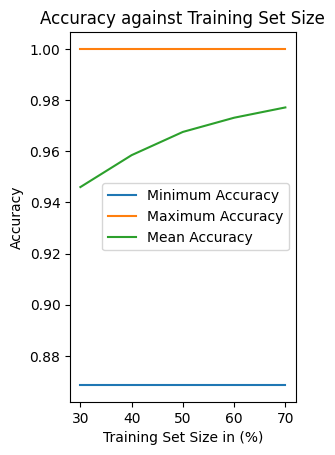

In [7]:
plt.subplot(1, 2, 1)
plt.title('Accuracy against Training Set Size')
plt.xlabel('Training Set Size in (%)')
plt.ylabel('Accuracy')
plt.plot(SplitingRRange, Accuracies_Minimum, label='Minimum Accuracy')
plt.plot(SplitingRRange, Accuracies_Maximum, label='Maximum Accuracy')
plt.plot(SplitingRRange, Accuracies_Mean, label='Mean Accuracy')



plt.legend()

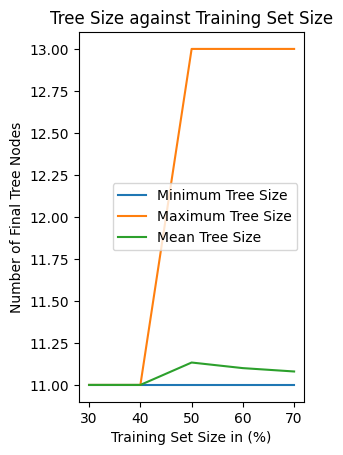

-------------------------------------------------


In [8]:
plt.subplot(1, 2, 2)
plt.title('Tree Size against Training Set Size')
plt.xlabel('Training Set Size in (%)')
plt.ylabel('Number of Final Tree Nodes')

plt.plot(SplitingRRange, TreeSizes_Minimum, label='Minimum Tree Size')
plt.plot(SplitingRRange, TreeSizes_Maximum, label='Maximum Tree Size')
plt.plot(SplitingRRange, TreeSizes_Mean, label='Mean Tree Size')




plt.legend()


plt.show()

print("-------------------------------------------------")